# NBA PREDICTION

1 Predict 2022-2023 NBA Playoffs Qualifiers:
- Develop a model to predict the NBA teams that will qualify for the 2022-2023 NBA Playoffs, separately for the Eastern and Western Conferences.
- Predict the eventual winners of each conference and the NBA Finals.
2 Create a Fictional Team:
- Create a fictional team comprising 15 players chosen randomly from the available NBA players.
- Predict the outcomes and performance of this fictional team for the 2022-2023 NBA season.

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'/Users/mac/Documents/nbaproject/notebook'

In [4]:
# importing data
df_allelo = pd.read_csv('Data/nbaallelo.csv')
df_allelo.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [5]:
df_allelo.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


In [6]:
df_allelo.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

# Feature meaning
- Header	Definition
- gameorder	Play order of game in NBA history
- game_id	Unique ID for each game
- lg_id	Which league the game was played in
- _iscopy	Each row of data is tied to a single team for a single game, so _iscopy flags if this game_id has already occured for the opposing team in the same matchup
- year_id	Season id, named based on year in which the season ended
- date_game	Game date
- is_playoffs	Flag for playoff games
- team_id	Three letter code for team name, from Basketball Reference
- fran_id	Franchise id. Multiple team_ids can fall under the same fran_id due to name changes or moves. Interactive is grouped by fran_id.
- pts	Points scored by team
- elo_i	Team elo entering the game
- elo_n	Team elo following the game
- win_equiv	Equivalent number of wins in a 82-game season for a team of elo_n quality
- opp_id	Team id of opponent
- opp_fran	Franchise id of opponent
- opp_pts	Points scored by opponent
- opp_elo_i	Opponent elo entering the game
- opp_elo_n	Opponent elo following the game
- game_location	Home (H), away (A), or neutral (N)
- game_result	Win or loss for team in the team_id column
- forecast	Elo-based chances of winning for the team in the team_id column, based on elo ratings and game location
- notes	Additional information

In [7]:
df_nbalatest = pd.read_csv('Data/nba_elo_latest.csv')
df_nbalatest.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
0,2022-10-18,2023,0,NaN,BOS,PHI,1657.639749,1582.247327,0.732950,0.267050,...,NaN,1693.243079,1641.876729,0.670612,0.329388,126,117,96,13,55
1,2022-10-18,2023,0,NaN,GSW,LAL,1660.620307,1442.352444,0.862011,0.137989,...,NaN,1615.718147,1472.173711,0.776502,0.223498,123,109,67,20,44
2,2022-10-19,2023,0,NaN,IND,WAS,1399.201934,1440.077372,0.584275,0.415725,...,NaN,1462.352663,1472.018225,0.599510,0.400490,107,114,37,28,33
3,2022-10-19,2023,0,NaN,DET,ORL,1393.525172,1366.089249,0.675590,0.324410,...,NaN,1308.969909,1349.865183,0.563270,0.436730,113,109,3,1,2
4,2022-10-19,2023,0,NaN,ATL,HOU,1535.408152,1351.164973,0.837022,0.162978,...,NaN,1618.256817,1283.328356,0.917651,0.082349,117,107,24,1,13


# Data Cleaning

In [15]:
def information_func(df):
    print("unique teams available in dataset", df.nunique())
    print('-----'*10)
    print('dataset info')
    df.info()
    print('-----'*10)
    null = df.isnull().sum()
    print("missing values:\n", null)

In [16]:
information_func(df_allelo)

unique teams available in dataset gameorder         63157
game_id           63157
lg_id                 2
_iscopy               2
year_id              69
date_game         12426
seasongame          108
is_playoffs           2
team_id             104
fran_id              53
pts                 139
elo_i            123947
elo_n            123982
win_equiv        123857
opp_id              104
opp_fran             53
opp_pts             139
opp_elo_i        123947
opp_elo_n        123982
game_location         3
game_result           2
forecast         125039
notes               231
dtype: int64
--------------------------------------------------
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 

In [39]:
# droping notes
df_allelo.drop('notes', axis = 1, inplace = True)

In [40]:
df_allelo.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065


In [20]:
#numeric and category features
numeric_features = [feature for feature in df_allelo.columns if df_allelo[feature].dtype != 'O']
categorical_features = [feature for feature in df_allelo.columns if df_allelo[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['gameorder', '_iscopy', 'year_id', 'seasongame', 'is_playoffs', 'pts', 'elo_i', 'elo_n', 'win_equiv', 'opp_pts', 'opp_elo_i', 'opp_elo_n', 'forecast']

We have 9 categorical features : ['game_id', 'lg_id', 'date_game', 'team_id', 'fran_id', 'opp_id', 'opp_fran', 'game_location', 'game_result']


In [25]:
df_allelo['game_result'].value_counts()

L    63157
W    63157
Name: game_result, dtype: int64

In [27]:
df_allelo.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [28]:
df_allelo.corr()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
gameorder,1.000000e+00,1.585846e-15,9.889661e-01,0.043452,3.666710e-03,-0.186835,0.130512,0.130139,0.011238,-0.186835,0.130512,0.130139,-3.396295e-11
_iscopy,1.585846e-15,1.000000e+00,1.811733e-15,0.000406,-1.437951e-18,-0.126343,0.001664,0.001514,0.001510,0.126343,-0.001664,-0.001514,-5.624614e-01
year_id,9.889661e-01,1.811733e-15,1.000000e+00,0.037180,-3.853061e-03,-0.123959,0.126331,0.125970,0.009217,-0.123959,0.126331,0.125970,-2.615831e-11
seasongame,4.345209e-02,4.062114e-04,3.718027e-02,1.000000,4.448132e-01,0.061916,0.110320,0.109983,0.111096,0.062722,0.111797,0.111498,-1.167542e-03
is_playoffs,3.666710e-03,-1.437951e-18,-3.853061e-03,0.444813,1.000000e+00,-0.039438,0.225418,0.224773,0.236597,-0.039438,0.225418,0.224773,1.412979e-11
pts,-1.868347e-01,-1.263427e-01,-1.239592e-01,0.061916,-3.943777e-02,1.000000,0.090233,0.121670,0.139801,0.592491,-0.147279,-0.178553,2.178615e-01
elo_i,1.305120e-01,1.664048e-03,1.263310e-01,0.110320,2.254180e-01,0.090233,1.000000,0.996053,0.953463,-0.147279,0.105460,0.106245,5.460675e-01
elo_n,1.301386e-01,1.514334e-03,1.259696e-01,0.109983,2.247731e-01,0.121670,0.996053,1.000000,0.957831,-0.178553,0.106245,0.099144,5.432202e-01
win_equiv,1.123794e-02,1.510179e-03,9.216879e-03,0.111096,2.365967e-01,0.139801,0.953463,0.957831,1.000000,-0.173759,0.024532,0.017365,5.679823e-01
opp_pts,-1.868347e-01,1.263427e-01,-1.239592e-01,0.062722,-3.943777e-02,0.592491,-0.147279,-0.178553,-0.173759,1.000000,0.090233,0.121670,-2.178615e-01


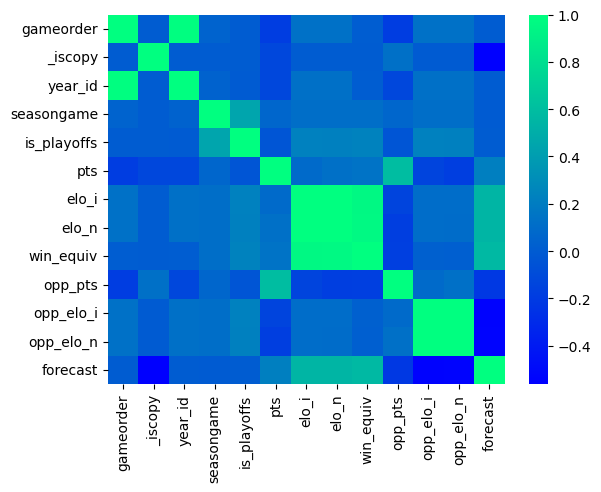

In [31]:
sns.heatmap(df_allelo.corr(), cmap='winter');


From the correlation heatmap it shows the iscopy, elo_i,elo_n, win_equiv, opp_elo_i, opp_elo_n correlate with forecast this will be considered during feature engineering  

In [44]:
# Map 'W' to 1 and 'L' to 0 in the 'game_result' column
df_allelo['game_result'] = df_allelo['game_result'].map({'W': 1, 'L': 0})

# Print the transformed DataFrame
df_allelo.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,0,0.640065
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,1,0.359935
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,1,0.631101
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,0,0.368899
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,0,0.640065


In [48]:
df_allelo['game_location'] = df_allelo['game_location'].map({'H': 1, 'A': 0})

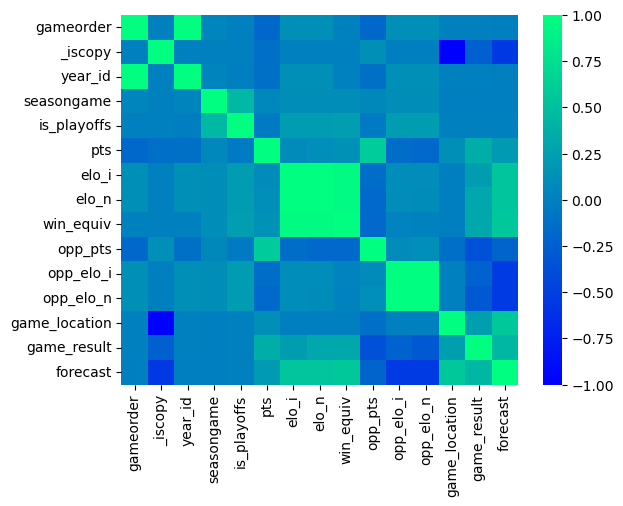

In [49]:
# checking for corelation with game result
sns.heatmap(df_allelo.corr(), cmap='winter');


<AxesSubplot:xlabel='forecast', ylabel='Count'>

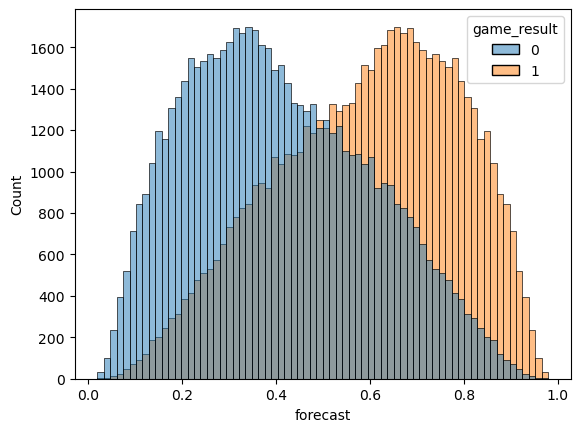

In [53]:
sns.histplot(data=df_allelo,x='forecast',hue='game_result')


In [57]:
df_allelo.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
126309    False
126310    False
126311    False
126312    False
126313    False
Length: 126314, dtype: bool

<AxesSubplot:>

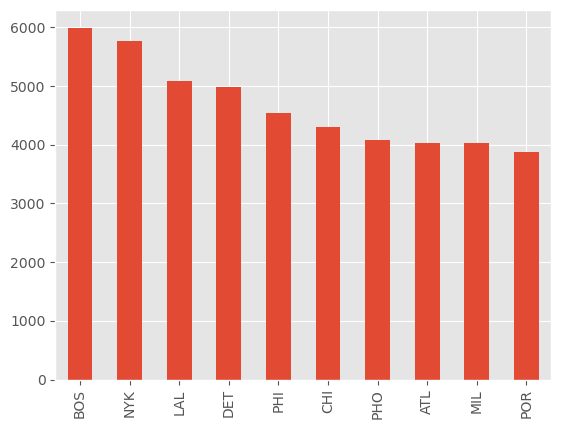

In [59]:
df_allelo['team_id'].value_counts() \
.head(10) \
.plot(kind = 'bar')

- Teams that had most games

Text(0.5, 0, 'elo_n')

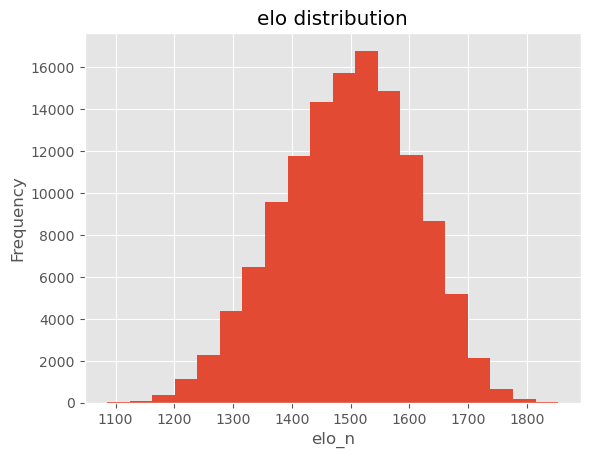

In [63]:
ax = df_allelo['elo_n'].plot(kind = 'hist', bins = 20, title = 'elo distribution')
ax.set_xlabel('elo_n')

Text(0.5, 0, 'elo_i')

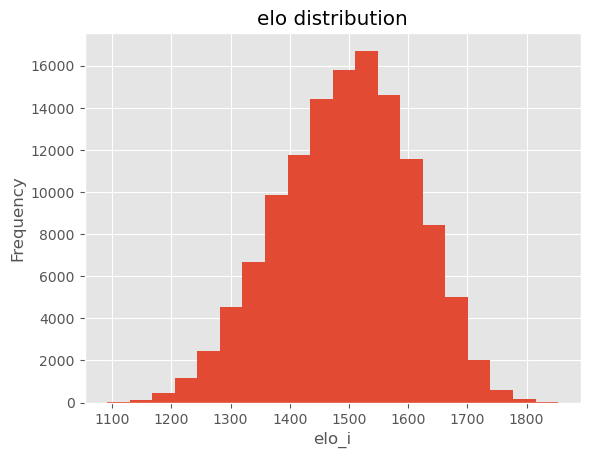

In [64]:
ax = df_allelo['elo_i'].plot(kind = 'hist', bins = 20, title = 'elo distribution')
ax.set_xlabel('elo_i')

- Elo is a simple measure of strength based on game-by-game results. 
- Elo ratings have a simple formula; the only inputs are the final score of each game, and where and when it was played. Teams always gain Elo points for winning. But they get more credit for upset victories and for winning by larger margins.

Text(0.5, 0, 'forecast')

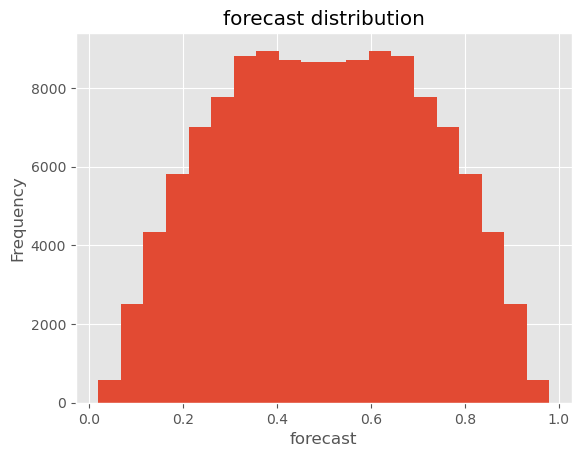

In [69]:
ax = df_allelo['forecast'].plot(kind = 'hist', bins = 20, title = 'forecast distribution')
ax.set_xlabel('forecast')

In [72]:
pd.set_option("display.max_columns",100)
df_allelo

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,1.0,0,0.640065
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,0.0,1,0.359935
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,1.0,1,0.631101
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,0.0,0,0.368899
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,1.0,0,0.640065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,1.0,0,0.546572
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,1.0,1,0.765565
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,0.0,0,0.234435
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,1.0,0,0.481450


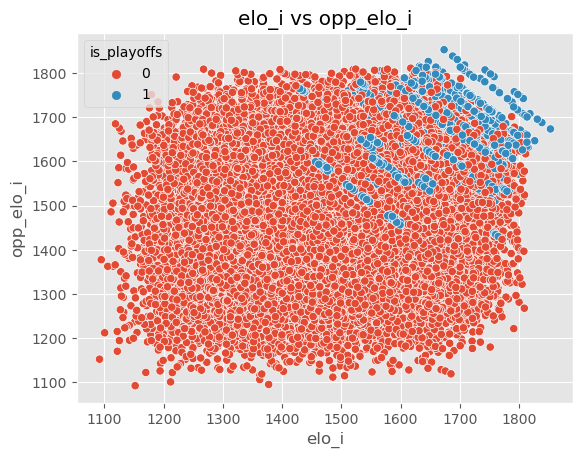

In [74]:
ax = sns.scatterplot(x = 'elo_i',
               y = 'opp_elo_i',
               hue = 'is_playoffs',
               data= df_allelo)
ax.set_title('elo_i vs opp_elo_i')
plt.show()

- Teams in playoff have elo_i rates higher that 1500

<AxesSubplot:title={'center':'win_equiv distribution'}, ylabel='Frequency'>

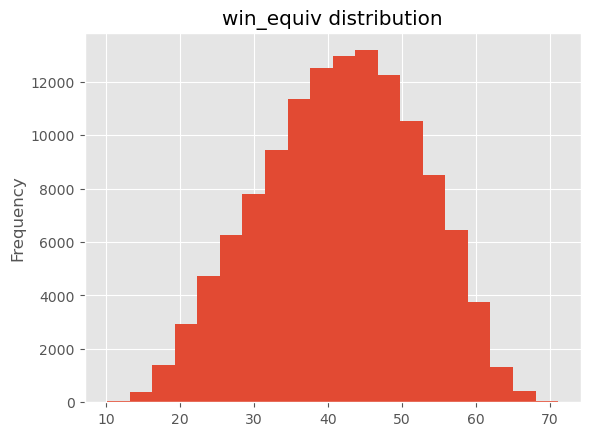

In [75]:
df_allelo['win_equiv'].plot(kind = 'hist', bins = 20, title = 'win_equiv distribution')

<AxesSubplot:xlabel='game_result', ylabel='forecast'>

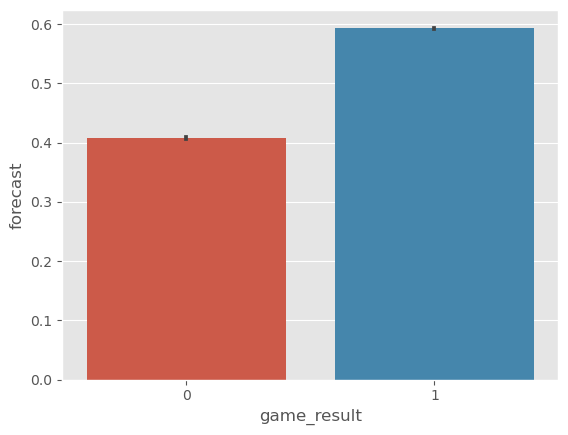

In [78]:
sns.barplot(x = 'game_result',
           y = 'forecast',
           data= df_allelo)

<AxesSubplot:ylabel='Frequency'>

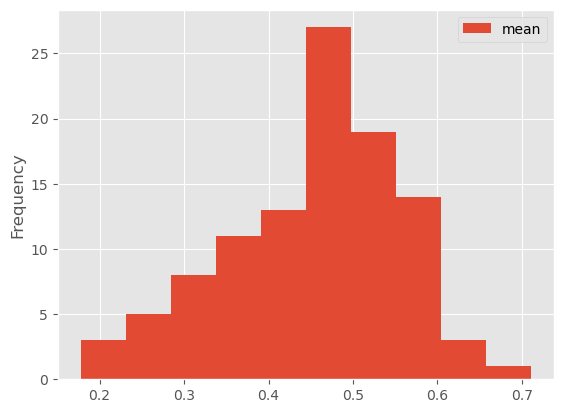

In [92]:
df_allelo.groupby('team_id')['game_result'].agg(['mean']).plot(kind = 'hist')

# Feature Engineering 
- Training with ridge classifier to select the best features to train with

In [96]:
df_allelo['date_game'] = pd.to_datetime(df_allelo['date_game'])

In [98]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha= 1)
split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, n_features_to_select= 5, direction= "forward", cv = split)

In [100]:
removed_columns = ['gameorder', 'game_id', 'lg_id','year_id', 'date_game',
       'seasongame','team_id', 'fran_id', 'pts','opp_id', 'opp_fran', 'opp_pts','game_result']

In [101]:
selected_columns = df_allelo.columns[~df_allelo.columns.isin(removed_columns)]

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_allelo[selected_columns] = scaler.fit_transform(df_allelo[selected_columns])

In [113]:
df_allelo = df_allelo.dropna()

In [114]:
sfs.fit(df_allelo[selected_columns], df_allelo['game_result'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=5)

In [115]:
predictors = list(selected_columns[sfs.get_support()])

- best feature to use for prediction

In [116]:
predictors

['elo_i', 'elo_n', 'win_equiv', 'opp_elo_n', 'forecast']

# Prediction of games results 
- training using a season and testing based on the next season

In [141]:
def backtest(data, model, predictors, start=2, step=2):
    all_prediction = []
    
    seasons = sorted(data["year_id"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["year_id"] < season]
        test = data[data["year_id" ] == season]
        
        model.fit(train[predictors], train["game_result"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["game_result"], preds], axis = 1)
        combined.columns = ["actual","prediction"]
        
        all_prediction.append(combined)
    return pd.concat(all_prediction)    
    

In [142]:
predictions = backtest(df_allelo, rr, predictors)

In [143]:
predictions 

,actual,prediction
1130,0,0
1131,1,0
1132,0,1
1133,1,0
1134,0,0
...,...,...
126309,0,0
126310,1,1
126311,0,0
126312,0,0


In [144]:
predictions.columns

Index(['actual', 'prediction'], dtype='object')

# Accuracy of the model


In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(predictions["actual"], predictions["prediction"])

0.9808415683774306

# I have an accuracy of 98%

In [148]:
df_allelo.groupby("game_location").apply(lambda x: x[x["game_result"] == 1].shape[0] / x.shape[0])

game_location
0.0    0.377475
1.0    0.622525
dtype: float64

# home team have higher percentage of winning

In [149]:
df_allelo

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0.0,1947,1946-11-01,1,0.0,TRH,Huskies,66,0.273626,0.270421,0.494465,NYK,Knicks,68,0.273626,0.287945,1.0,0,0.646037
1,1,194611010TRH,NBA,1.0,1947,1946-11-01,1,0.0,NYK,Knicks,68,0.273626,0.287945,0.517600,TRH,Huskies,66,0.273626,0.270421,0.0,1,0.353963
2,2,194611020CHS,NBA,0.0,1947,1946-11-02,1,0.0,CHS,Stags,63,0.273626,0.291762,0.522638,NYK,Knicks,47,0.282456,0.275366,1.0,1,0.636691
3,2,194611020CHS,NBA,1.0,1947,1946-11-02,2,0.0,NYK,Knicks,47,0.282456,0.275366,0.500993,CHS,Stags,63,0.273626,0.291762,0.0,0,0.363309
4,3,194611020DTF,NBA,0.0,1947,1946-11-02,1,0.0,DTF,Falcons,33,0.273626,0.252622,0.470994,WSC,Capitols,50,0.273626,0.305744,1.0,0,0.646037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0.0,2015,2015-06-11,100,1.0,CLE,Cavaliers,82,0.829683,0.806199,0.822796,GSW,Warriors,103,0.918387,0.943798,1.0,0,0.548558
126310,63156,201506140GSW,NBA,0.0,2015,2015-06-14,102,1.0,GSW,Warriors,104,0.943365,0.948562,0.949168,CLE,Cavaliers,91,0.804705,0.801434,1.0,1,0.776888
126311,63156,201506140GSW,NBA,1.0,2015,2015-06-14,101,1.0,CLE,Cavaliers,91,0.804705,0.801434,0.817880,GSW,Warriors,104,0.943365,0.948562,0.0,0,0.223112
126312,63157,201506170CLE,NBA,0.0,2015,2015-06-16,102,1.0,CLE,Cavaliers,97,0.799904,0.790157,0.806071,GSW,Warriors,105,0.948166,0.959839,1.0,0,0.480659


# Taking moving average of how the team perform in the last ten game to improve the model

In [156]:
df_rolling = df_allelo[list(selected_columns) + ["team_id", "year_id","game_result"]]

In [157]:
df_rolling

,_iscopy,is_playoffs,elo_i,elo_n,win_equiv,opp_elo_i,opp_elo_n,game_location,forecast,team_id,year_id,game_result
0,0.0,0.0,0.273626,0.270421,0.494465,0.273626,0.287945,1.0,0.646037,TRH,1947,0
1,1.0,0.0,0.273626,0.287945,0.517600,0.273626,0.270421,0.0,0.353963,NYK,1947,1
2,0.0,0.0,0.273626,0.291762,0.522638,0.282456,0.275366,1.0,0.636691,CHS,1947,1
3,1.0,0.0,0.282456,0.275366,0.500993,0.273626,0.291762,0.0,0.363309,NYK,1947,0
4,0.0,0.0,0.273626,0.252622,0.470994,0.273626,0.305744,1.0,0.646037,DTF,1947,0
...,...,...,...,...,...,...,...,...,...,...,...,...
126309,0.0,1.0,0.829683,0.806199,0.822796,0.918387,0.943798,1.0,0.548558,CLE,2015,0
126310,0.0,1.0,0.943365,0.948562,0.949168,0.804705,0.801434,1.0,0.776888,GSW,2015,1
126311,1.0,1.0,0.804705,0.801434,0.817880,0.943365,0.948562,0.0,0.223112,CLE,2015,0
126312,0.0,1.0,0.799904,0.790157,0.806071,0.948166,0.959839,1.0,0.480659,CLE,2015,0


In [160]:
def find_team_averages(team):
    rolling = team.rolling(10).mean()
    return rolling

df_rolling = df_rolling.groupby(["team_id", "year_id"], group_keys= False).apply(find_team_averages)

In [161]:
df_rolling

,_iscopy,is_playoffs,elo_i,elo_n,win_equiv,opp_elo_i,opp_elo_n,game_location,forecast,year_id,game_result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126309,0.5,1.0,0.792017,0.800085,0.815952,0.775538,0.770778,0.5,0.516325,2015.0,0.8
126310,0.4,1.0,0.928494,0.932467,0.936762,0.781827,0.780070,0.6,0.676525,2015.0,0.7
126311,0.6,1.0,0.798544,0.805575,0.821917,0.801101,0.797133,0.4,0.468779,2015.0,0.7
126312,0.5,1.0,0.804077,0.807284,0.823751,0.827659,0.827269,0.5,0.474706,2015.0,0.6


In [163]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols

df = pd.concat([df_allelo, df_rolling], axis = 1)

In [164]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,_iscopy_10_10,is_playoffs_10_10,elo_i_10_10,elo_n_10_10,win_equiv_10_10,opp_elo_i_10_10,opp_elo_n_10_10,game_location_10_10,forecast_10_10,year_id_10_10,game_result_10_10
0,1,194611010TRH,NBA,0.0,1947,1946-11-01,1,0.0,TRH,Huskies,66,0.273626,0.270421,0.494465,NYK,Knicks,68,0.273626,0.287945,1.0,0,0.646037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,194611010TRH,NBA,1.0,1947,1946-11-01,1,0.0,NYK,Knicks,68,0.273626,0.287945,0.517600,TRH,Huskies,66,0.273626,0.270421,0.0,1,0.353963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,194611020CHS,NBA,0.0,1947,1946-11-02,1,0.0,CHS,Stags,63,0.273626,0.291762,0.522638,NYK,Knicks,47,0.282456,0.275366,1.0,1,0.636691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,194611020CHS,NBA,1.0,1947,1946-11-02,2,0.0,NYK,Knicks,47,0.282456,0.275366,0.500993,CHS,Stags,63,0.273626,0.291762,0.0,0,0.363309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,194611020DTF,NBA,0.0,1947,1946-11-02,1,0.0,DTF,Falcons,33,0.273626,0.252622,0.470994,WSC,Capitols,50,0.273626,0.305744,1.0,0,0.646037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0.0,2015,2015-06-11,100,1.0,CLE,Cavaliers,82,0.829683,0.806199,0.822796,GSW,Warriors,103,0.918387,0.943798,1.0,0,0.548558,0.5,1.0,0.792017,0.800085,0.815952,0.775538,0.770778,0.5,0.516325,2015.0,0.8
126310,63156,201506140GSW,NBA,0.0,2015,2015-06-14,102,1.0,GSW,Warriors,104,0.943365,0.948562,0.949168,CLE,Cavaliers,91,0.804705,0.801434,1.0,1,0.776888,0.4,1.0,0.928494,0.932467,0.936762,0.781827,0.780070,0.6,0.676525,2015.0,0.7
126311,63156,201506140GSW,NBA,1.0,2015,2015-06-14,101,1.0,CLE,Cavaliers,91,0.804705,0.801434,0.817880,GSW,Warriors,104,0.943365,0.948562,0.0,0,0.223112,0.6,1.0,0.798544,0.805575,0.821917,0.801101,0.797133,0.4,0.468779,2015.0,0.7
126312,63157,201506170CLE,NBA,0.0,2015,2015-06-16,102,1.0,CLE,Cavaliers,97,0.799904,0.790157,0.806071,GSW,Warriors,105,0.948166,0.959839,1.0,0,0.480659,0.5,1.0,0.804077,0.807284,0.823751,0.827659,0.827269,0.5,0.474706,2015.0,0.6


- game_result_10_10 shows the average performance for the last 10 games

In [165]:
df = df.dropna()
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,_iscopy_10_10,is_playoffs_10_10,elo_i_10_10,elo_n_10_10,win_equiv_10_10,opp_elo_i_10_10,opp_elo_n_10_10,game_location_10_10,forecast_10_10,year_id_10_10,game_result_10_10
79,40,194611210GSW,NBA,1.0,1947,1946-11-21,10,0.0,CHS,Stags,65,0.304906,0.318402,0.557714,PHW,Warriors,63,0.274986,0.272354,0.0,1,0.386008,0.6,0.0,0.298329,0.307618,0.543522,0.275039,0.276663,0.4,0.495036,1947.0,0.7
89,45,194611230PRO,NBA,1.0,1947,1946-11-23,10,0.0,STB,Bombers,65,0.317372,0.334261,0.578474,PRO,Steamrollers,59,0.240669,0.234812,0.0,1,0.437886,0.5,0.0,0.290077,0.301016,0.534808,0.272423,0.272481,0.5,0.518871,1947.0,0.8
91,46,194611230WSC,NBA,1.0,1947,1946-11-23,10,0.0,TRH,Huskies,50,0.248256,0.241976,0.456992,WSC,Capitols,74,0.331997,0.349138,0.0,0,0.270989,0.5,0.0,0.257921,0.259877,0.480561,0.266586,0.275917,0.5,0.491335,1947.0,0.3
92,47,194611240CHS,NBA,0.0,1947,1946-11-24,11,0.0,CHS,Stags,55,0.313148,0.293362,0.524750,DTF,Falcons,68,0.257066,0.287789,1.0,0,0.702844,0.6,0.0,0.302281,0.307778,0.543733,0.272500,0.277906,0.4,0.501651,1947.0,0.6
93,47,194611240CHS,NBA,1.0,1947,1946-11-24,10,0.0,DTF,Falcons,68,0.257066,0.287789,0.517395,CHS,Stags,55,0.313148,0.293362,0.0,1,0.297156,0.4,0.0,0.250719,0.257312,0.477189,0.267149,0.271894,0.6,0.511981,1947.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0.0,2015,2015-06-11,100,1.0,CLE,Cavaliers,82,0.829683,0.806199,0.822796,GSW,Warriors,103,0.918387,0.943798,1.0,0,0.548558,0.5,1.0,0.792017,0.800085,0.815952,0.775538,0.770778,0.5,0.516325,2015.0,0.8
126310,63156,201506140GSW,NBA,0.0,2015,2015-06-14,102,1.0,GSW,Warriors,104,0.943365,0.948562,0.949168,CLE,Cavaliers,91,0.804705,0.801434,1.0,1,0.776888,0.4,1.0,0.928494,0.932467,0.936762,0.781827,0.780070,0.6,0.676525,2015.0,0.7
126311,63156,201506140GSW,NBA,1.0,2015,2015-06-14,101,1.0,CLE,Cavaliers,91,0.804705,0.801434,0.817880,GSW,Warriors,104,0.943365,0.948562,0.0,0,0.223112,0.6,1.0,0.798544,0.805575,0.821917,0.801101,0.797133,0.4,0.468779,2015.0,0.7
126312,63157,201506170CLE,NBA,0.0,2015,2015-06-16,102,1.0,CLE,Cavaliers,97,0.799904,0.790157,0.806071,GSW,Warriors,105,0.948166,0.959839,1.0,0,0.480659,0.5,1.0,0.804077,0.807284,0.823751,0.827659,0.827269,0.5,0.474706,2015.0,0.6


- Give the algorithm information to make better prediction like the if the game is H or A

In [167]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team_id", group_keys = False).apply(lambda x: shift_col(x, col_name))

df["home_next"] = add_col(df, "game_location")
df["team_opp_next"] = add_col(df, "opp_id")
df["date_next"] = add_col(df, "date_game")

In [168]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,_iscopy_10_10,is_playoffs_10_10,elo_i_10_10,elo_n_10_10,win_equiv_10_10,opp_elo_i_10_10,opp_elo_n_10_10,game_location_10_10,forecast_10_10,year_id_10_10,game_result_10_10,home_next,team_opp_next,date_next
79,40,194611210GSW,NBA,1.0,1947,1946-11-21,10,0.0,CHS,Stags,65,0.304906,0.318402,0.557714,PHW,Warriors,63,0.274986,0.272354,0.0,1,0.386008,0.6,0.0,0.298329,0.307618,0.543522,0.275039,0.276663,0.4,0.495036,1947.0,0.7,1.0,DTF,1946-11-24
89,45,194611230PRO,NBA,1.0,1947,1946-11-23,10,0.0,STB,Bombers,65,0.317372,0.334261,0.578474,PRO,Steamrollers,59,0.240669,0.234812,0.0,1,0.437886,0.5,0.0,0.290077,0.301016,0.534808,0.272423,0.272481,0.5,0.518871,1947.0,0.8,0.0,NYK,1946-11-27
91,46,194611230WSC,NBA,1.0,1947,1946-11-23,10,0.0,TRH,Huskies,50,0.248256,0.241976,0.456992,WSC,Capitols,74,0.331997,0.349138,0.0,0,0.270989,0.5,0.0,0.257921,0.259877,0.480561,0.266586,0.275917,0.5,0.491335,1947.0,0.3,1.0,WSC,1946-11-26
92,47,194611240CHS,NBA,0.0,1947,1946-11-24,11,0.0,CHS,Stags,55,0.313148,0.293362,0.524750,DTF,Falcons,68,0.257066,0.287789,1.0,0,0.702844,0.6,0.0,0.302281,0.307778,0.543733,0.272500,0.277906,0.4,0.501651,1947.0,0.6,0.0,WSC,1946-11-27
93,47,194611240CHS,NBA,1.0,1947,1946-11-24,10,0.0,DTF,Falcons,68,0.257066,0.287789,0.517395,CHS,Stags,55,0.313148,0.293362,0.0,1,0.297156,0.4,0.0,0.250719,0.257312,0.477189,0.267149,0.271894,0.6,0.511981,1947.0,0.4,1.0,CLR,1946-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0.0,2015,2015-06-11,100,1.0,CLE,Cavaliers,82,0.829683,0.806199,0.822796,GSW,Warriors,103,0.918387,0.943798,1.0,0,0.548558,0.5,1.0,0.792017,0.800085,0.815952,0.775538,0.770778,0.5,0.516325,2015.0,0.8,0.0,GSW,2015-06-14
126310,63156,201506140GSW,NBA,0.0,2015,2015-06-14,102,1.0,GSW,Warriors,104,0.943365,0.948562,0.949168,CLE,Cavaliers,91,0.804705,0.801434,1.0,1,0.776888,0.4,1.0,0.928494,0.932467,0.936762,0.781827,0.780070,0.6,0.676525,2015.0,0.7,0.0,CLE,2015-06-16
126311,63156,201506140GSW,NBA,1.0,2015,2015-06-14,101,1.0,CLE,Cavaliers,91,0.804705,0.801434,0.817880,GSW,Warriors,104,0.943365,0.948562,0.0,0,0.223112,0.6,1.0,0.798544,0.805575,0.821917,0.801101,0.797133,0.4,0.468779,2015.0,0.7,1.0,GSW,2015-06-16
126312,63157,201506170CLE,NBA,0.0,2015,2015-06-16,102,1.0,CLE,Cavaliers,97,0.799904,0.790157,0.806071,GSW,Warriors,105,0.948166,0.959839,1.0,0,0.480659,0.5,1.0,0.804077,0.807284,0.823751,0.827659,0.827269,0.5,0.474706,2015.0,0.6,NaN,NaN,NaT


- The new column predicts the next game next opp and if it is going to be home or away

In [169]:
df = df.copy()

In [197]:
df = df.drop('date_next', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112893 entries, 79 to 126313
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   gameorder            112893 non-null  int64         
 1   game_id              112893 non-null  object        
 2   lg_id                112893 non-null  object        
 3   _iscopy              112893 non-null  float64       
 4   year_id              112893 non-null  int64         
 5   date_game            112893 non-null  datetime64[ns]
 6   seasongame           112893 non-null  int64         
 7   is_playoffs          112893 non-null  float64       
 8   team_id              112893 non-null  object        
 9   fran_id              112893 non-null  object        
 10  pts                  112893 non-null  int64         
 11  elo_i                112893 non-null  float64       
 12  elo_n                112893 non-null  float64       
 13  win_equiv    

In [204]:
df = df.dropna()

feature engineering for the new feature developed

In [206]:
removed_columns = list(df.columns[df.dtypes == object]) + removed_columns

In [207]:
removed_columns 

['game_id',
 'lg_id',
 'team_id',
 'fran_id',
 'opp_id',
 'opp_fran',
 'team_opp_next',
 'game_id',
 'lg_id',
 'team_id',
 'fran_id',
 'opp_id',
 'opp_fran',
 'team_opp_next',
 'game_id',
 'lg_id',
 'team_id',
 'fran_id',
 'opp_id',
 'opp_fran',
 'team_opp_next',
 'game_id',
 'lg_id',
 'team_id',
 'fran_id',
 'opp_id',
 'opp_fran',
 'team_opp_next',
 'gameorder',
 'game_id',
 'lg_id',
 'year_id',
 'date_game',
 'seasongame',
 'team_id',
 'fran_id',
 'pts',
 'opp_id',
 'opp_fran',
 'opp_pts',
 'game_result']

In [208]:
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [209]:
selected_columns

Index(['_iscopy', 'is_playoffs', 'elo_i', 'elo_n', 'win_equiv', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'forecast', '_iscopy_10_10',
       'is_playoffs_10_10', 'elo_i_10_10', 'elo_n_10_10', 'win_equiv_10_10',
       'opp_elo_i_10_10', 'opp_elo_n_10_10', 'game_location_10_10',
       'forecast_10_10', 'year_id_10_10', 'game_result_10_10', 'home_next'],
      dtype='object')

In [210]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rf, n_features_to_select= 7, direction= "forward", cv = split)

In [212]:
sfs.fit(df[selected_columns], df["game_result"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RandomForestClassifier(),
                          n_features_to_select=7)

In [213]:
predictors = list(selected_columns[sfs.get_support()])

In [214]:
predictors

['_iscopy',
 'is_playoffs',
 'game_location',
 '_iscopy_10_10',
 'is_playoffs_10_10',
 'game_result_10_10',
 'home_next']

# best features we can use for the prediction

In [215]:
predictions = backtest(df, rf, predictors)

In [216]:
predictions

,actual,prediction
1209,1,1
1218,0,0
1220,1,0
1228,0,0
1232,1,1
...,...,...
126307,1,1
126308,1,1
126309,0,1
126310,1,1


In [217]:
accuracy_score(predictions["actual"], predictions["prediction"])

0.6987203512341382

- Randomforest give 69% accuracy 
- working with this model for deployment because we are using features of opponents teams
- The model can predict the NBA teams that will qualify for the 2022-2023 NBA Playoffs, when we input the data known about the next game